## Here there is imported the data

All the data must be loaded from a excel file that is in the same folder. This file is numeric only and contains in the last column the dependent variable. The column name of the last column should be Outcome

In [1]:
#import pandas
import pandas as pd
# load dataset
pima = pd.read_csv("archive/1_lebron_james_shot_chart_1_2023.csv")
X = pima[["top","left","shot_type","distance_ft","lebron_team_score","opponent_team_score"]]
display(X)

,top,left,shot_type,distance_ft,lebron_team_score,opponent_team_score
0,310,203,3,26,2,2
1,213,259,2,16,4,5
2,143,171,2,11,4,7
3,68,215,2,3,12,19
4,66,470,3,23,22,23
...,...,...,...,...,...,...
1528,118,274,2,8,98,102
1529,109,221,2,6,100,102
1530,78,254,2,3,104,107
1531,78,46,2,20,111,113


In [2]:
#seleccion = lambda x: 1 if x.bool()==True else 0
y= pima[["result"]].replace({True: 1, False: 0})
display(y)

,result
0,0
1,0
2,0
3,1
4,0
...,...
1528,0
1529,0
1530,1
1531,0


## Exploratory data analysis

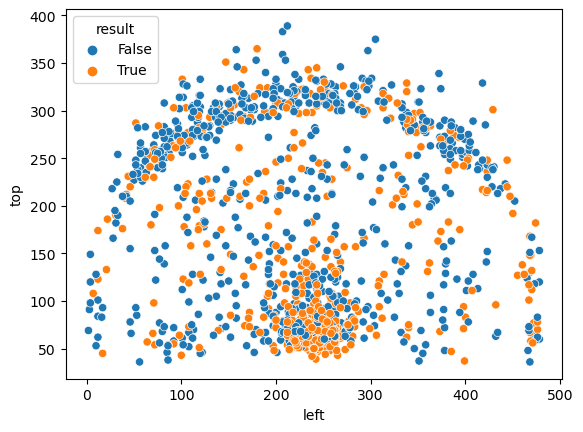

In [17]:

import seaborn as sns
sns.scatterplot(data = db, x = "left", y="top", hue="result")
plt.savefig("left_top_Camilo.jpg")


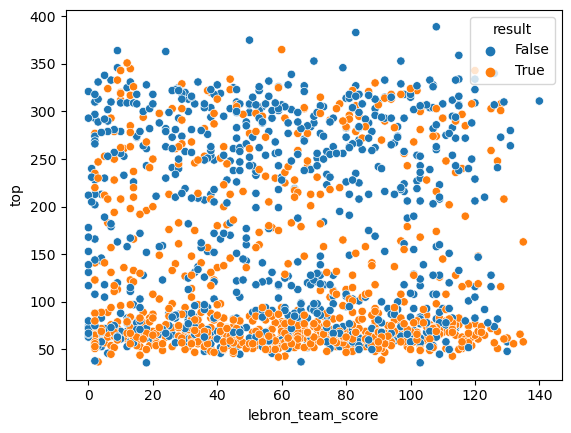

In [20]:
import seaborn as sns
sns.scatterplot(data = db, x = "lebron_team_score", y="top", hue="result")
plt.savefig("lebron_team_score_top_Camilo.jpg")

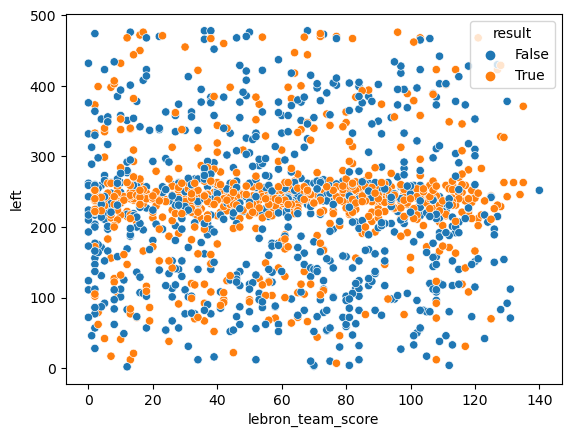

In [19]:

import seaborn as sns
sns.scatterplot(data = db, x = "lebron_team_score", y="left", hue="result")
plt.savefig("lebron_team_score_left_Camilo.jpg")

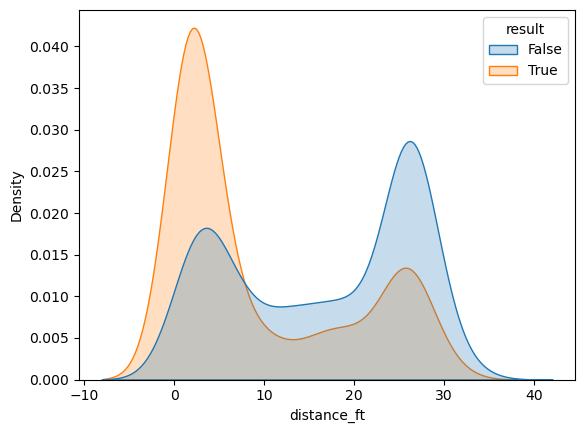

In [18]:
import seaborn as sns
sns.kdeplot(x = "distance_ft", data = db, hue="result", fill=True)
plt.savefig("distance_ft_Camilo.jpg")

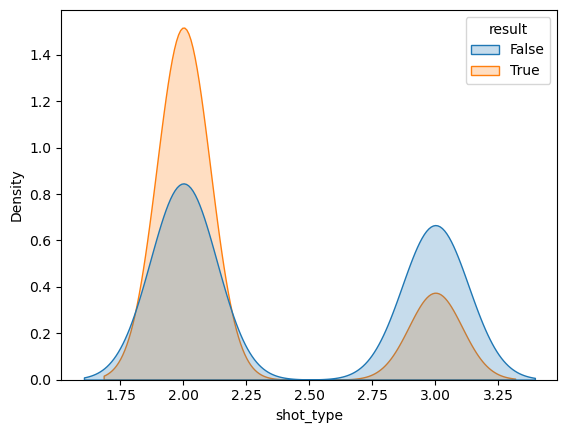

In [11]:
import seaborn as sns
sns.kdeplot(x = "shot_type", data = db, hue="result", fill=True)
plt.savefig("shot_type_Camilo.jpg")

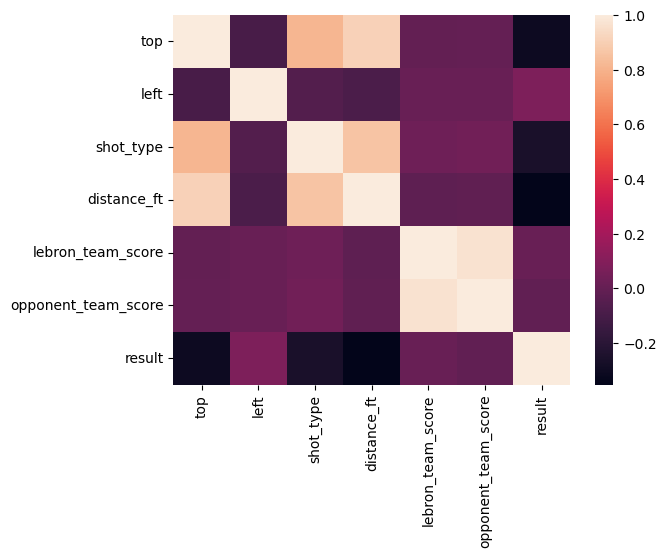

In [8]:
db = pima[["top","left","shot_type","distance_ft","lebron_team_score","opponent_team_score","result"]]

sns.heatmap(db.corr(method="pearson"))
plt.savefig("heatmap_Camilo.png")


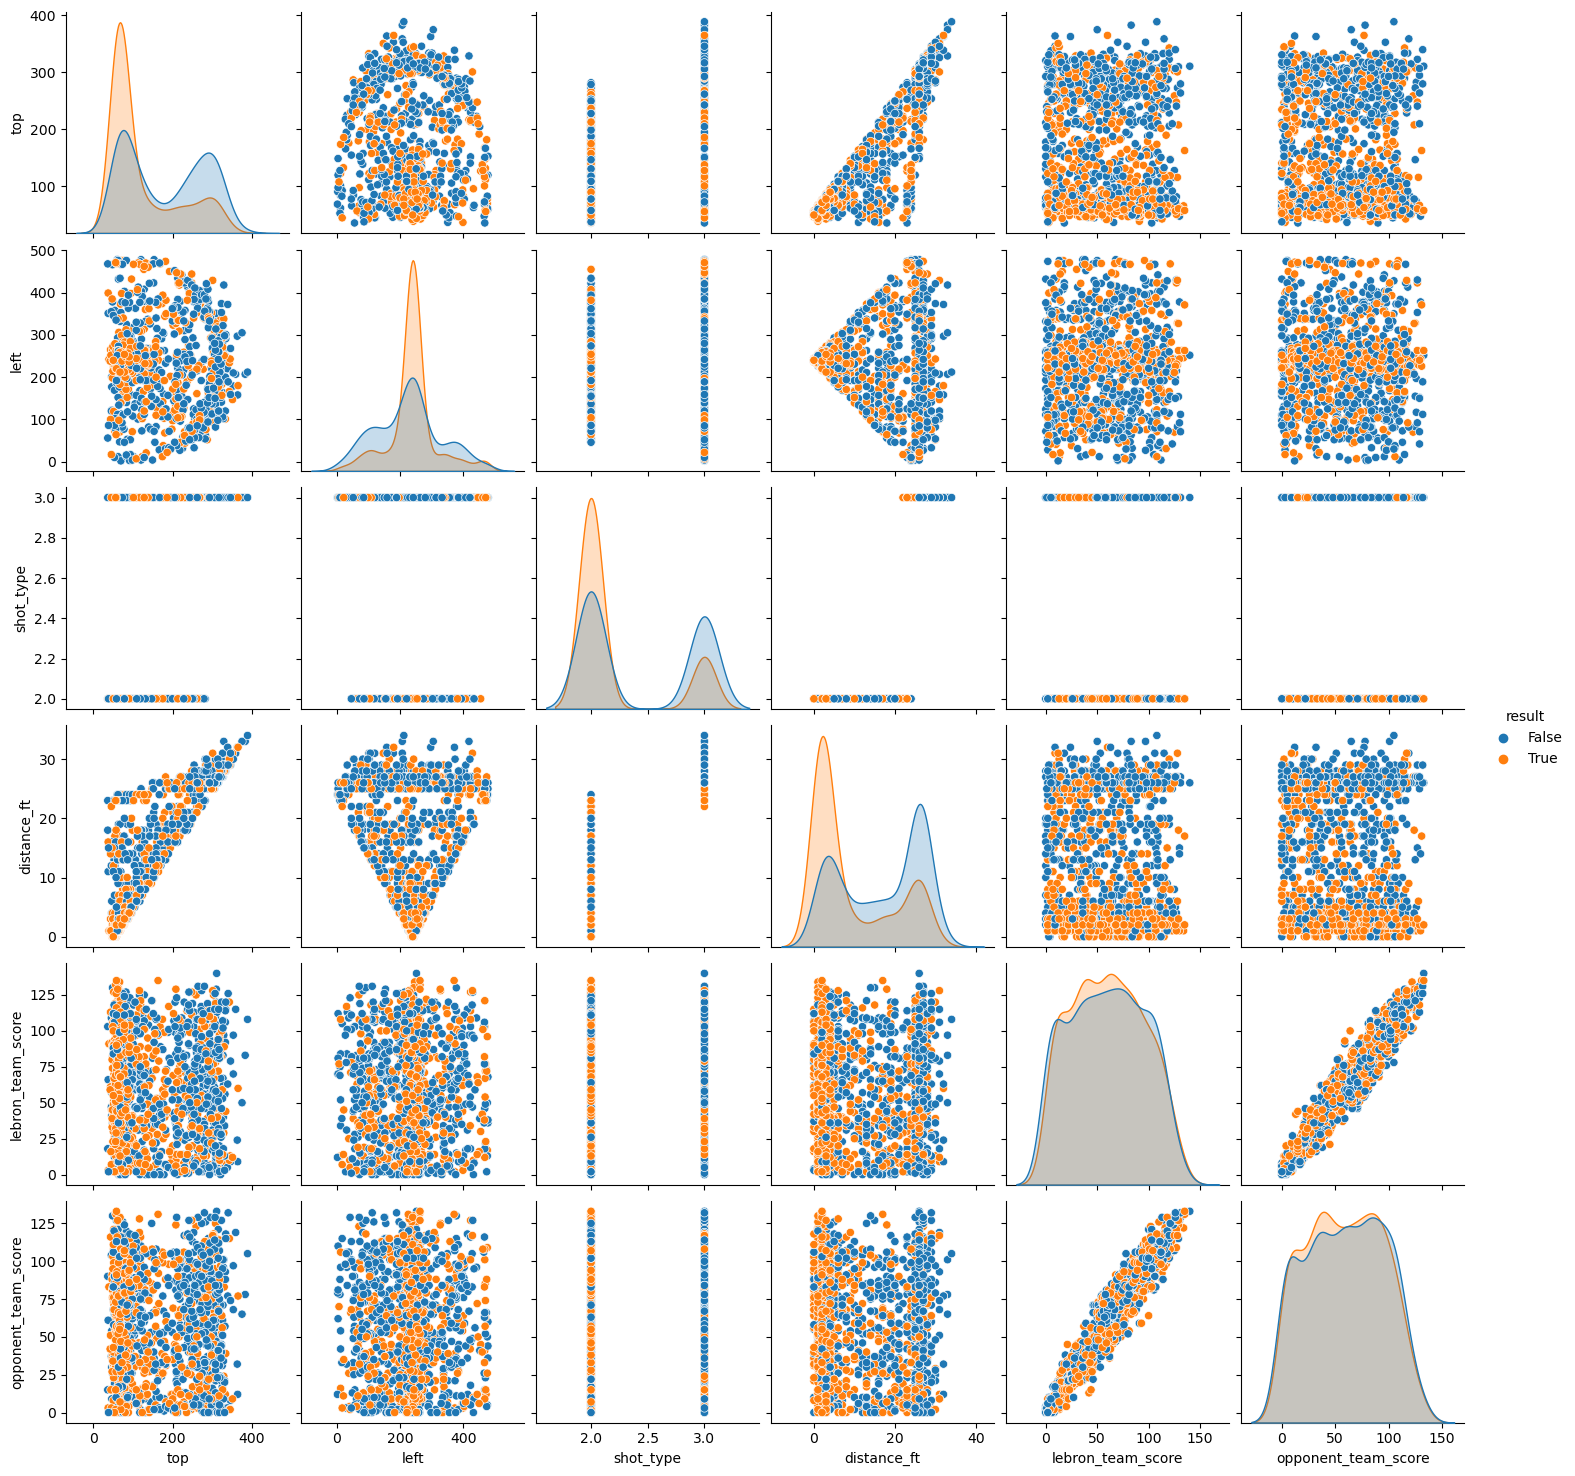

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

db = pima[["top","left","shot_type","distance_ft","lebron_team_score","opponent_team_score","result"]]
pair = sns.pairplot(db, hue="result")
plt.savefig("paiplot_Camilo.jpg")

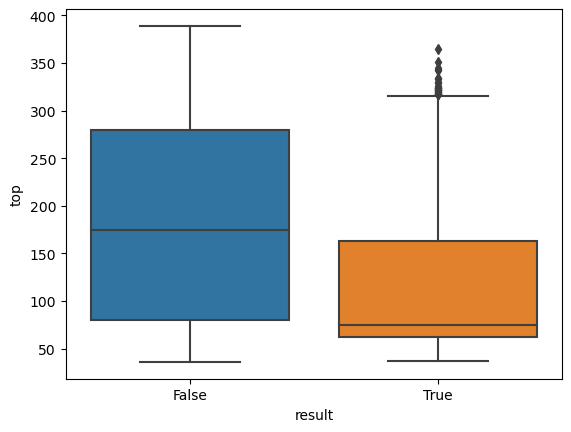

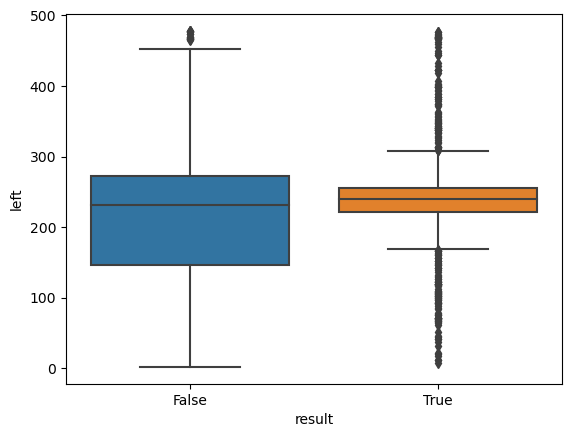

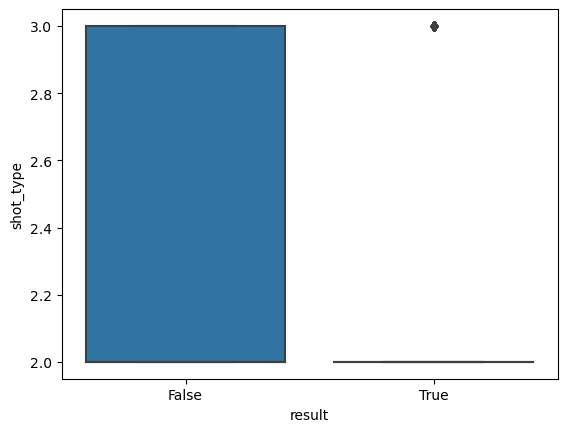

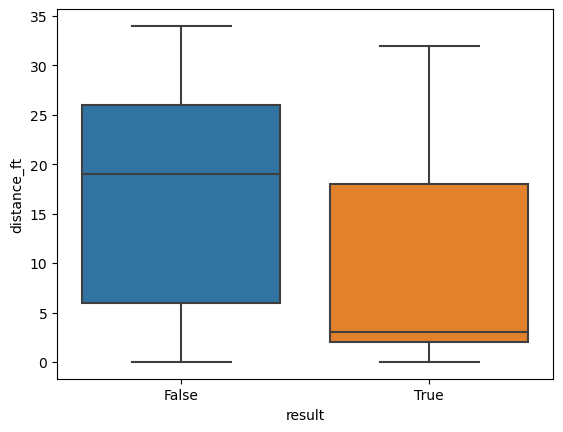

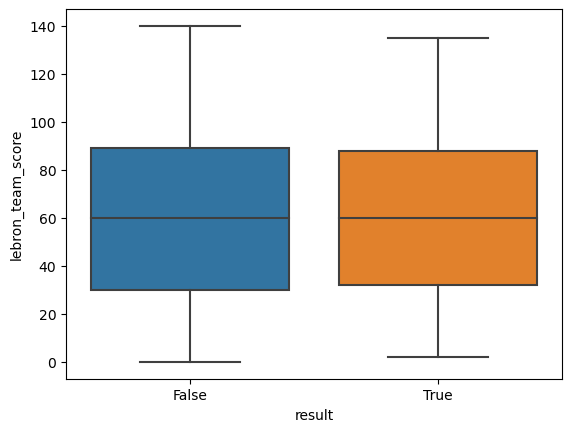

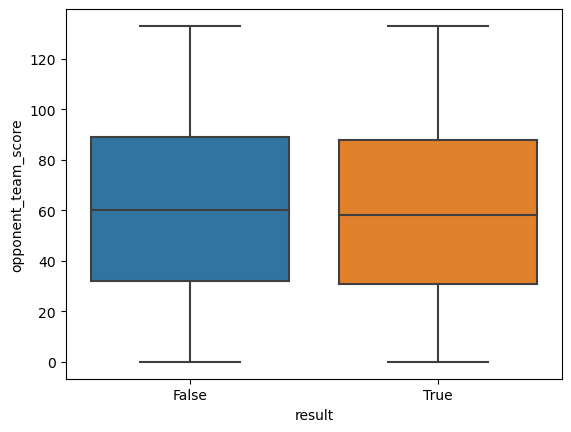

In [67]:
for i in ["top","left","shot_type","distance_ft","lebron_team_score","opponent_team_score"]:
    
    fig=plt.figure()
    sns.boxplot(db[[i,"result"]], x="result", y=i)
    plt.savefig("Box_"+i+".jpg")

## Split X and y into training and testing sets

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Fit the logistic regression model with the train dataset

In [22]:
import numpy as np
# import the class
from sklearn.linear_model import LogisticRegression

#Regresion lineal y logística
from sklearn.linear_model import LogisticRegression

#Ajustes previos al entrenamiento o para ajuste de hiperparámetros
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#Hacer Pipelines
from sklearn.pipeline import Pipeline
estimator_lr = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures(include_bias=False)),
        ("logistic_regression", LogisticRegression(max_iter=10000, tol=0.1,solver='liblinear'))])

params_lr = {'polynomial_features__degree': [1, 2, 3, 4, 5],
             "logistic_regression__C": np.logspace(-4,4,10),
             "logistic_regression__penalty": ["l1","l2"]}

kf = StratifiedKFold(shuffle=True, n_splits=3)
grid_lr = GridSearchCV(estimator_lr, params_lr, cv=kf, verbose=1)
%time grid_lr.fit(X_train, y_train);

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred2 = grid_lr.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/itnas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/itnas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/itnas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/itnas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning

CPU times: user 4.15 s, sys: 114 ms, total: 4.27 s
Wall time: 4.29 s


/Users/itnas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/itnas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/itnas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/itnas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning

In [23]:
grid_lr.best_params_

{'logistic_regression__C': 21.54434690031882,
 'logistic_regression__penalty': 'l1',
 'polynomial_features__degree': 1}

## Estadística F usando conjunto de prueba

In [25]:
from sklearn.feature_selection import f_classif


# Calcular el F-statistic
f_statistic, p_value = f_classif(X_test, y_test)

# Imprimir el F-statistic
print("F-statistic:", f_statistic)

# También puedes imprimir el p-value si es necesario
print("p-value:", p_value)

F-statistic: [6.60171495e+01 3.41089109e+00 3.98926136e+01 7.77913523e+01
 9.55456662e-02 2.12557660e-02]
p-value: [4.19632270e-15 6.54123221e-02 6.35738012e-10 2.41596079e-17
 7.57382509e-01 8.84148493e-01]


/Users/itnas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Estadística F usando conjunto de entrenamiento

In [24]:
from sklearn.feature_selection import f_classif


# Calcular el F-statistic
f_statistic, p_value = f_classif(X_train, y_train)

# Imprimir el F-statistic
print("F-statistic:", f_statistic)

# También puedes imprimir el p-value si es necesario
print("p-value:", p_value)


F-statistic: [9.45403240e+01 6.14069570e+00 6.88165983e+01 1.36814923e+02
 1.18436305e-01 1.24074801e-01]
p-value: [1.79812339e-21 1.33637973e-02 3.21780930e-16 7.90345211e-30
 7.30804226e-01 7.24725682e-01]


/Users/itnas/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
grid_lr.best_estimator_[2].coef_[0]

array([-0.16121954,  0.40054306,  0.33690879, -0.65762824,  0.89791516,
       -0.91713001, -0.18411692,  0.02485131, -0.34727068,  0.15587683,
        0.19418006,  0.1236571 , -0.17639468,  0.18003344, -0.40481991,
       -0.47467944,  0.58625056,  0.10887502, -0.3432803 ,  0.26589892,
        0.01290862,  0.81939191, -0.30358084, -0.30145661, -0.09592633,
       -0.2257713 ,  0.24909464])

In [49]:
logreg.coef_[0]

array([ 0.00176614,  0.00160777,  0.51020336, -0.10345634,  0.02272363,
       -0.02318781])

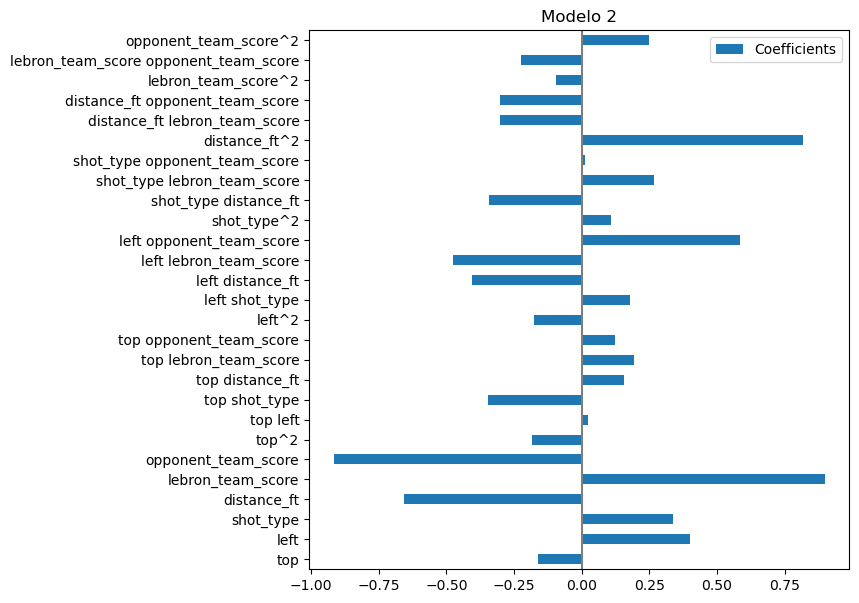

In [50]:
Columnas = grid_lr.best_estimator_[1].get_feature_names_out(X_test.columns)
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
    grid_lr.best_estimator_[2].coef_[0], columns=["Coefficients"], index=Columnas
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Modelo 2")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)
plt.savefig("Caracteristicas_Camilo2.jpg")

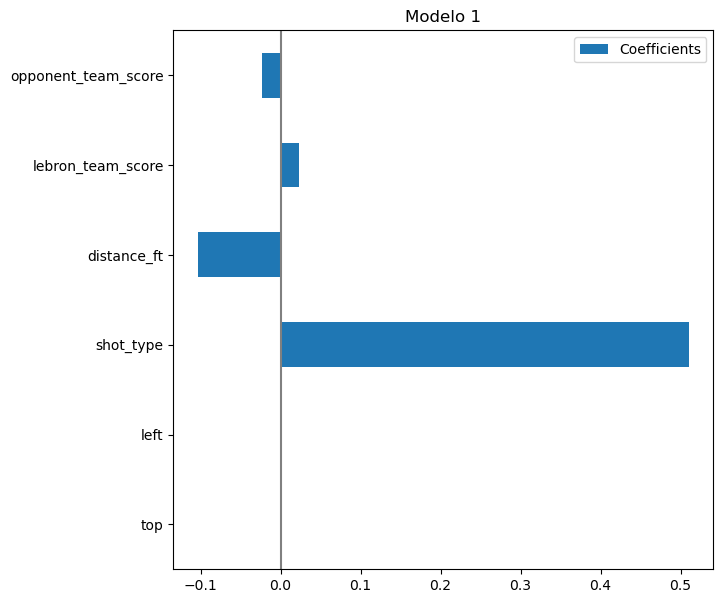

In [51]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
    logreg.coef_[0], columns=["Coefficients"], index=X_train.columns
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Modelo 1")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)
plt.savefig("Caracteristicas_Camilo.jpg")

## Compute the confusion matrix

In [52]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[150,  71],
       [ 79, 160]])

In [53]:
# import the metrics class
from sklearn import metrics

cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred2)
cnf_matrix2

array([[160,  61],
       [ 84, 155]])

## Plot the confusion matrix

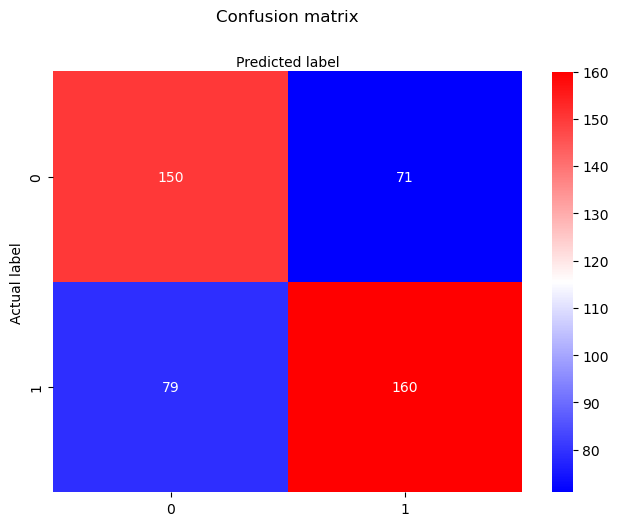

In [55]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="bwr" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.savefig("Confussion_Camilo.jpg")


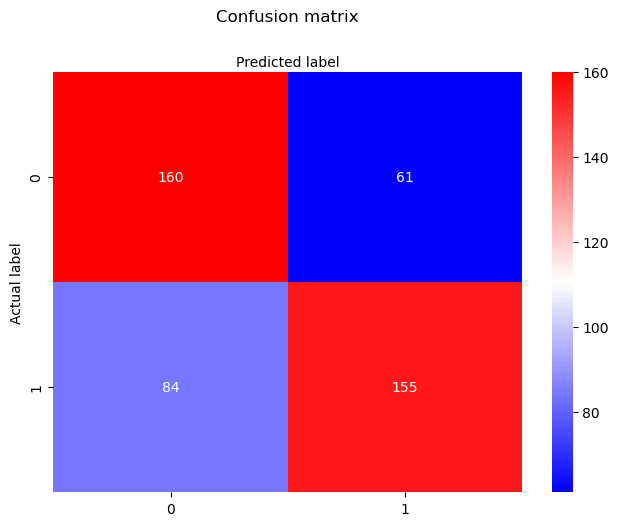

In [58]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="bwr" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.savefig("Confussion_Camilo2.jpg")

## Compute the metrics

In [64]:
from sklearn.metrics import classification_report
target_names = ['missed shot', 'successful shot']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    missed shot       0.66      0.68      0.67       221
successful shot       0.69      0.67      0.68       239

       accuracy                           0.67       460
      macro avg       0.67      0.67      0.67       460
   weighted avg       0.67      0.67      0.67       460



In [65]:
from sklearn.metrics import classification_report
target_names = ['missed shot', 'successful shot']
print(classification_report(y_test, y_pred2, target_names=target_names))

                 precision    recall  f1-score   support

    missed shot       0.66      0.72      0.69       221
successful shot       0.72      0.65      0.68       239

       accuracy                           0.68       460
      macro avg       0.69      0.69      0.68       460
   weighted avg       0.69      0.68      0.68       460



## Compute the ROC Curve

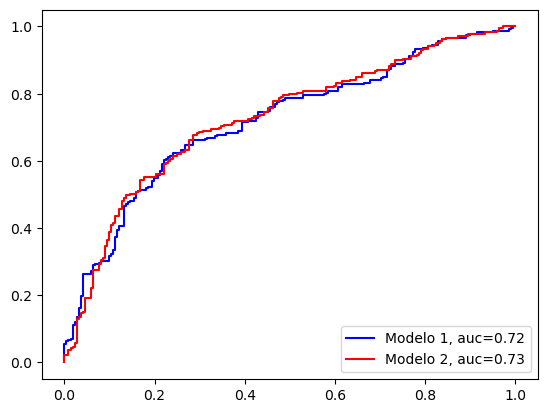

<Figure size 640x480 with 0 Axes>

In [61]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

y_pred_proba2 = grid_lr.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba2)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)


plt.plot(fpr,tpr,label="Modelo 1, auc={0:.2f}".format(auc),color="b")
plt.plot(fpr2,tpr2,label="Modelo 2, auc={0:.2f}".format(auc2),color="r")

plt.legend(loc=4)
plt.show()

plt.savefig("ROC_Camilo.jpg")